# Hugging Face for Sentiment, Q&A

In [1]:
%%capture
#INCLUDING SCIENTIFIC AND NUMERICAL COMPUTING LIBRARIES
#Run this code to make sure that you have all the libraries at one go.
%pylab inline
import os
import pandas as pd
# %load_ext rpy2.ipython
from IPython.display import Image

In [2]:
# Basic lines of code needed to import a data file with permissions from Google Drive
from google.colab import drive
# drive.mount("/content/drive", force_remount=True)
drive.mount('/content/drive')
os.chdir("drive/My Drive/Books_Writings/NLPBook/")

Mounted at /content/drive


## Using Hugging Face Transformers for Sentiment Scoring

See: https://huggingface.co/

Hugging Face provides an incredible array of NLP tools that are very simple to use. It is an incredible approach to democratizing NLP. We will use their Transformers package.

This a bert-base-multilingual-uncased model finetuned for sentiment analysis on product reviews in six languages: English, Dutch, German, French, Spanish and Italian. It predicts the sentiment of the review as a number of stars (between 1 and 5).

https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment

See for example: https://www.curiousily.com/posts/sentiment-analysis-with-bert-and-hugging-face-using-pytorch-and-python/


In [3]:
# %%capture
# !pip install pytorch
!pip install transformers[torch] --quiet
!pip install accelerate -U --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 9.2 MB/s eta 0:00:00


In [4]:
import torch
from transformers import pipeline
scoreSentiment = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [5]:
text = 'We’re on a journey to advance and democratize NLP for everyone. Along the way, we contribute to the development of technology for the better.'
print(text)
scoreSentiment(text)

We’re on a journey to advance and democratize NLP for everyone. Along the way, we contribute to the development of technology for the better.


[{'label': 'POSITIVE', 'score': 0.9995071887969971}]

In [6]:
print(scoreSentiment('Weeks of violent clashes between federal agents and protesters in Portland, Ore., galvanized thousands of people to march through the streets of American cities on Saturday, injecting new life into protests that had largely waned in recent weeks.'))
print(scoreSentiment('The police responded by firing flash grenades, showering protesters with pepper spray and abruptly rushing into crowds, knocking people to the ground. After a flash grenade left one woman with bloody injuries, police officers shoved people who had stopped to help her.'))

[{'label': 'POSITIVE', 'score': 0.9797046184539795}]
[{'label': 'NEGATIVE', 'score': 0.9931089878082275}]


## Question and Answering

Transformers can also be used for Q&A. It is very easy to set up.

This is a nice blog that gives you more details: https://towardsdatascience.com/explainbertqa-687abe3b2fcc

In [7]:
QnA = pipeline("question-answering") # This is a pre-trained model

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cuda:0


In [10]:
text = 'The federal courthouse in Portland has been the scene of nightly, chaotic demonstrations for weeks, which continued again into Sunday morning, as thousands participated in marches around the city, the 59th consecutive day of protests there. Earlier, a group of nurses in scrubs had joined an organized group of mothers in helmets and fathers in hard hats, all assembled against the fence of a federal courthouse where federal agents — a deployment that has been a key focus of the recent demonstrations — have been assembled.'
print(text)

ans = QnA({'question': 'What is happening in Portland?', 'context': text})
print(ans)

The federal courthouse in Portland has been the scene of nightly, chaotic demonstrations for weeks, which continued again into Sunday morning, as thousands participated in marches around the city, the 59th consecutive day of protests there. Earlier, a group of nurses in scrubs had joined an organized group of mothers in helmets and fathers in hard hats, all assembled against the fence of a federal courthouse where federal agents — a deployment that has been a key focus of the recent demonstrations — have been assembled.
{'score': 0.3924693465232849, 'start': 74, 'end': 88, 'answer': 'demonstrations'}


In [11]:
ans = QnA({'question': 'Who are the demonstators?', 'context': text})
print(ans)

{'score': 0.5871760845184326, 'start': 418, 'end': 432, 'answer': 'federal agents'}


In [12]:
ans = QnA({'question': 'When did the demonstrations happen?', 'context': text})
print(ans)

{'score': 0.9344968795776367, 'start': 127, 'end': 141, 'answer': 'Sunday morning'}


In [13]:
ans = QnA({'question': 'How long did the demonstrations last?', 'context': text})
print(ans)

{'score': 0.23806874454021454, 'start': 127, 'end': 141, 'answer': 'Sunday morning'}


In [14]:
 ans = QnA({'question': 'Why on earth did I take this boring course?', 'context': text}) # Unrelated question
print(ans)

{'score': 0.11029750108718872, 'start': 66, 'end': 88, 'answer': 'chaotic demonstrations'}


Much of this functionality has been usurped by LLMs!

## Distillation

Ref: https://towardsdatascience.com/distillation-of-bert-like-models-the-theory-32e19a02641f

The idea behind distillation is to reduce the number of parameters of the original model (also known as the "teacher" model) to a smaller model (denoted as the "student" model). This is usually done by having fewer hidden layers in the student model and training these layers to generate the same output as the teacher model. The reference above depicts this architecture in the following graphic. You can read about the details in the article, which is excellent.

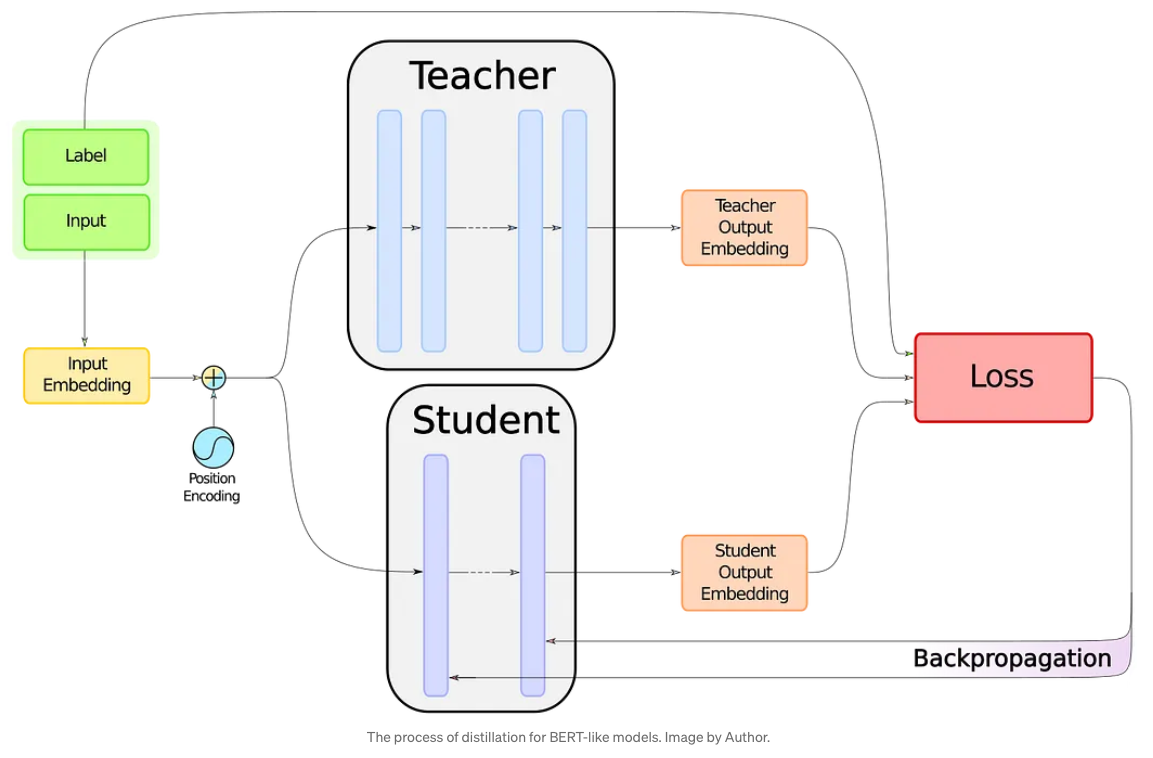

In [13]:
Image("NLP_images/teacher_student.png", width=800)

## Using Hugging Face for text classification

We will download the AG News dataset: http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html

See the same on Hugging Face: https://huggingface.co/datasets/viewer/?dataset=ag_news

https://huggingface.co/datasets/wangrongsheng/ag_news



In [15]:
!pip install datasets --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [16]:
import datasets
datasets

<module 'datasets' from '/usr/local/lib/python3.11/dist-packages/datasets/__init__.py'>

In [16]:
# # https://hackernoon.com/nlp-datasets-from-huggingface-how-to-access-and-train-them-i22u35t9
# from datasets import list_datasets, load_dataset
# from pprint import pprint

# datasets_list = list_datasets()
# print("Number of datasets =", len(datasets_list))
# # pprint(datasets_list,compact=True)

In [17]:
from datasets import load_dataset
dataset = load_dataset('ag_news')
print(dataset)

README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})


In [18]:
df_train = load_dataset('ag_news','default',split='train').to_pandas()
df_test = load_dataset('ag_news','default',split='test').to_pandas()

In [19]:
df_train.head()

text  label
0  Wall St. Bears Claw Back Into the Black (Reute...      2
1  Carlyle Looks Toward Commercial Aerospace (Reu...      2
2  Oil and Economy Cloud Stocks' Outlook (Reuters...      2
3  Iraq Halts Oil Exports from Main Southern Pipe...      2
4  Oil prices soar to all-time record, posing new...      2

In [20]:
df_train.label.groupby(df_train.label).count()

label
0    30000
1    30000
2    30000
3    30000
Name: label, dtype: int64

In [20]:
# Subset data for quick run
ntrain = 5000
ntest = 1000

In [21]:
from transformers import DistilBertTokenizer, DistilBertModel

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [22]:
inputs = tokenizer("Hello new World!", return_tensors="pt")
outputs = model(**inputs)

x = array(outputs.last_hidden_state.detach()) # To convert to a numpy array, detach first from torch
print(x.shape)
x[0][:,:5]

(1, 6, 768)


array([[-0.12557712, -0.13725324,  0.14662963, -0.18246058, -0.22283383],
       [-0.3664784 ,  0.41534883,  0.7468105 , -0.6168315 ,  0.27368066],
       [-0.232606  , -0.08210962,  0.6729307 , -0.09339743,  0.4407267 ],
       [ 0.01433105,  0.1426486 ,  0.5805187 , -0.13335617,  0.65808153],
       [-0.23666444, -0.26574713,  0.2277732 , -0.5975928 ,  0.07788546],
       [ 0.9137555 ,  0.1831059 , -0.24395643,  0.3854501 , -0.46605077]],
      dtype=float32)

We get 6 tokens because of word piece tokenization: https://aclanthology.org/2021.emnlp-main.160.pdf

## Text Classification using PyTorch

https://www.thepythoncode.com/article/finetuning-bert-using-huggingface-transformers-python

In [24]:
import torch
# from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import numpy as np
import random
from sklearn.model_selection import train_test_split

In [25]:
# Tokenizer and max number of tokens per example
max_seq_length = 512
model_name = 'bert-base-uncased'
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

# Create train and test data as lists
train_texts = list(df_train.text)[:ntrain]
train_labels = list(df_train.label)[:ntrain]
test_texts = list(df_test.text)[:ntest]
test_labels = list(df_test.label)[:ntest]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [26]:
%%time
# Tokenize train and test data
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_seq_length)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=max_seq_length)

CPU times: user 1.98 s, sys: 125 ms, total: 2.1 s
Wall time: 3.85 s


In [27]:
class AGNewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_dataset = AGNewsDataset(train_encodings, train_labels)
test_dataset = AGNewsDataset(test_encodings, test_labels)

In [28]:
print(train_texts[:2])
train_dataset[1]

["Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.", 'Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.']


{'input_ids': tensor([  101, 18431,  2571,  3504,  2646,  3293, 13395,  1006, 26665,  1007,
         26665,  1011,  2797,  5211,  3813, 18431,  2571,  2177,  1010,  1032,
          2029,  2038,  1037,  5891,  2005,  2437,  2092,  1011, 22313,  1998,
          5681,  1032,  6801,  3248,  1999,  1996,  3639,  3068,  1010,  2038,
          5168,  2872,  1032,  2049, 29475,  2006,  2178,  2112,  1997,  1996,
          3006,  1012,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,   

In [29]:
# load the model and pass to CUDA (if GPU available)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=ntrain).to("cuda")
# model = BertForSequenceClassification.from_pretrained(model_name, num_labels=ntrain)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
from sklearn.metrics import accuracy_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds)
  return {
      'accuracy': acc,
  }

In [31]:
# Hyperparameters
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=1,              # total number of training epochs
    per_device_train_batch_size=8,   # batch size per device during training
    per_device_eval_batch_size=20,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=10,               # log & save weights each logging_steps
    save_steps=100,
    evaluation_strategy="steps",     # evaluate each `logging_steps`
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [32]:
trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset,           # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

In [33]:
%%time
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: srdas to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


wandb: WARNING Serializing object of type dict that is 147544 bytes
wandb: WARNING Serializing object of type dict that is 103856 bytes


Could not locate the best model at ./results/checkpoint-530/pytorch_model.bin, if you are running a distributed training on multiple nodes, you should activate `--save_on_each_node`.


CPU times: user 15min 58s, sys: 18.6 s, total: 16min 16s
Wall time: 27min 36s


TrainOutput(global_step=625, training_loss=2.4775263092041016, metrics={'train_runtime': 1655.6869, 'train_samples_per_second': 3.02, 'train_steps_per_second': 0.377, 'total_flos': 918183733920000.0, 'train_loss': 2.4775263092041016, 'epoch': 1.0})

## Text Classification with TensorFlow

This has been made very easy since the development of the `ktrain` library: https://github.com/amaiya/ktrain

For text classification using `ktrain`, see:
1. https://nbviewer.org/github/amaiya/ktrain/blob/master/tutorials/tutorial-04-text-classification.ipynb

2. https://towardsdatascience.com/text-classification-with-hugging-face-transformers-in-tensorflow-2-without-tears-ee50e4f3e7ed


In [47]:
!pip install tf_keras==2.18.0 --quiet
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'
!pip install -U ktrain --quiet


In [48]:
# Set up datasets as lists
x_train = list(df_train.text)[:ntrain]
y_train = list(df_train.label)[:ntrain]
x_test = list(df_test.text)[:ntest]
y_test = list(df_test.label)[:ntest]
print("Classes :", unique(y_train))

model_name = 'distilbert-base-uncased'
max_seq_length = 512

import ktrain
from ktrain import text
t = text.Transformer(model_name, maxlen=max_seq_length, classes=unique(y_train))

Classes : [0 1 2 3]


ImportError: `keras.optimizers.legacy` is not supported in Keras 3. When using `tf.keras`, to continue using a `tf.keras.optimizers.legacy` optimizer, you can install the `tf_keras` package (Keras 2) and set the environment variable `TF_USE_LEGACY_KERAS=True` to configure TensorFlow to use `tf_keras` when accessing `tf.keras`.

In [ ]:
# Preprocess the datasets into a format required by the pre-trained model
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)

In [ ]:
# Create a model and training module
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=16)

In [ ]:
# Estimate the learning rate
learner.lr_find(show_plot=True, max_epochs=1)

In [ ]:
# TRAIN
init_lr = 5e-4 # This is about where the LR starts to decline
num_epochs = 1
learner.fit_onecycle(init_lr, num_epochs)

In [ ]:
# PREDICT
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
z = randint(len(y_test))
print(x_test[z])
print(y_test[z])
print(predictor.predict(x_test[0]))

In [ ]:
# EXPLAIN
predictor.explain(x_test[z])

For demo purposes, we trained just one epoch above, so it will need a few more to achieve good levels of accuracy.